In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv('/content/Cars (1).csv')
df.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [ ]:
#dataset description

df.describe()

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


In [ ]:
#checking for missing values

df.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

In [ ]:
#scatter matrix, correlation matrix
#pairplot, pd.plotting.scatter_matrix

In [ ]:
plt.rcParams['figure.figsize'] = (7,4)
plt.rcParams['figure.dpi'] = 150
sns.set_style('darkgrid')

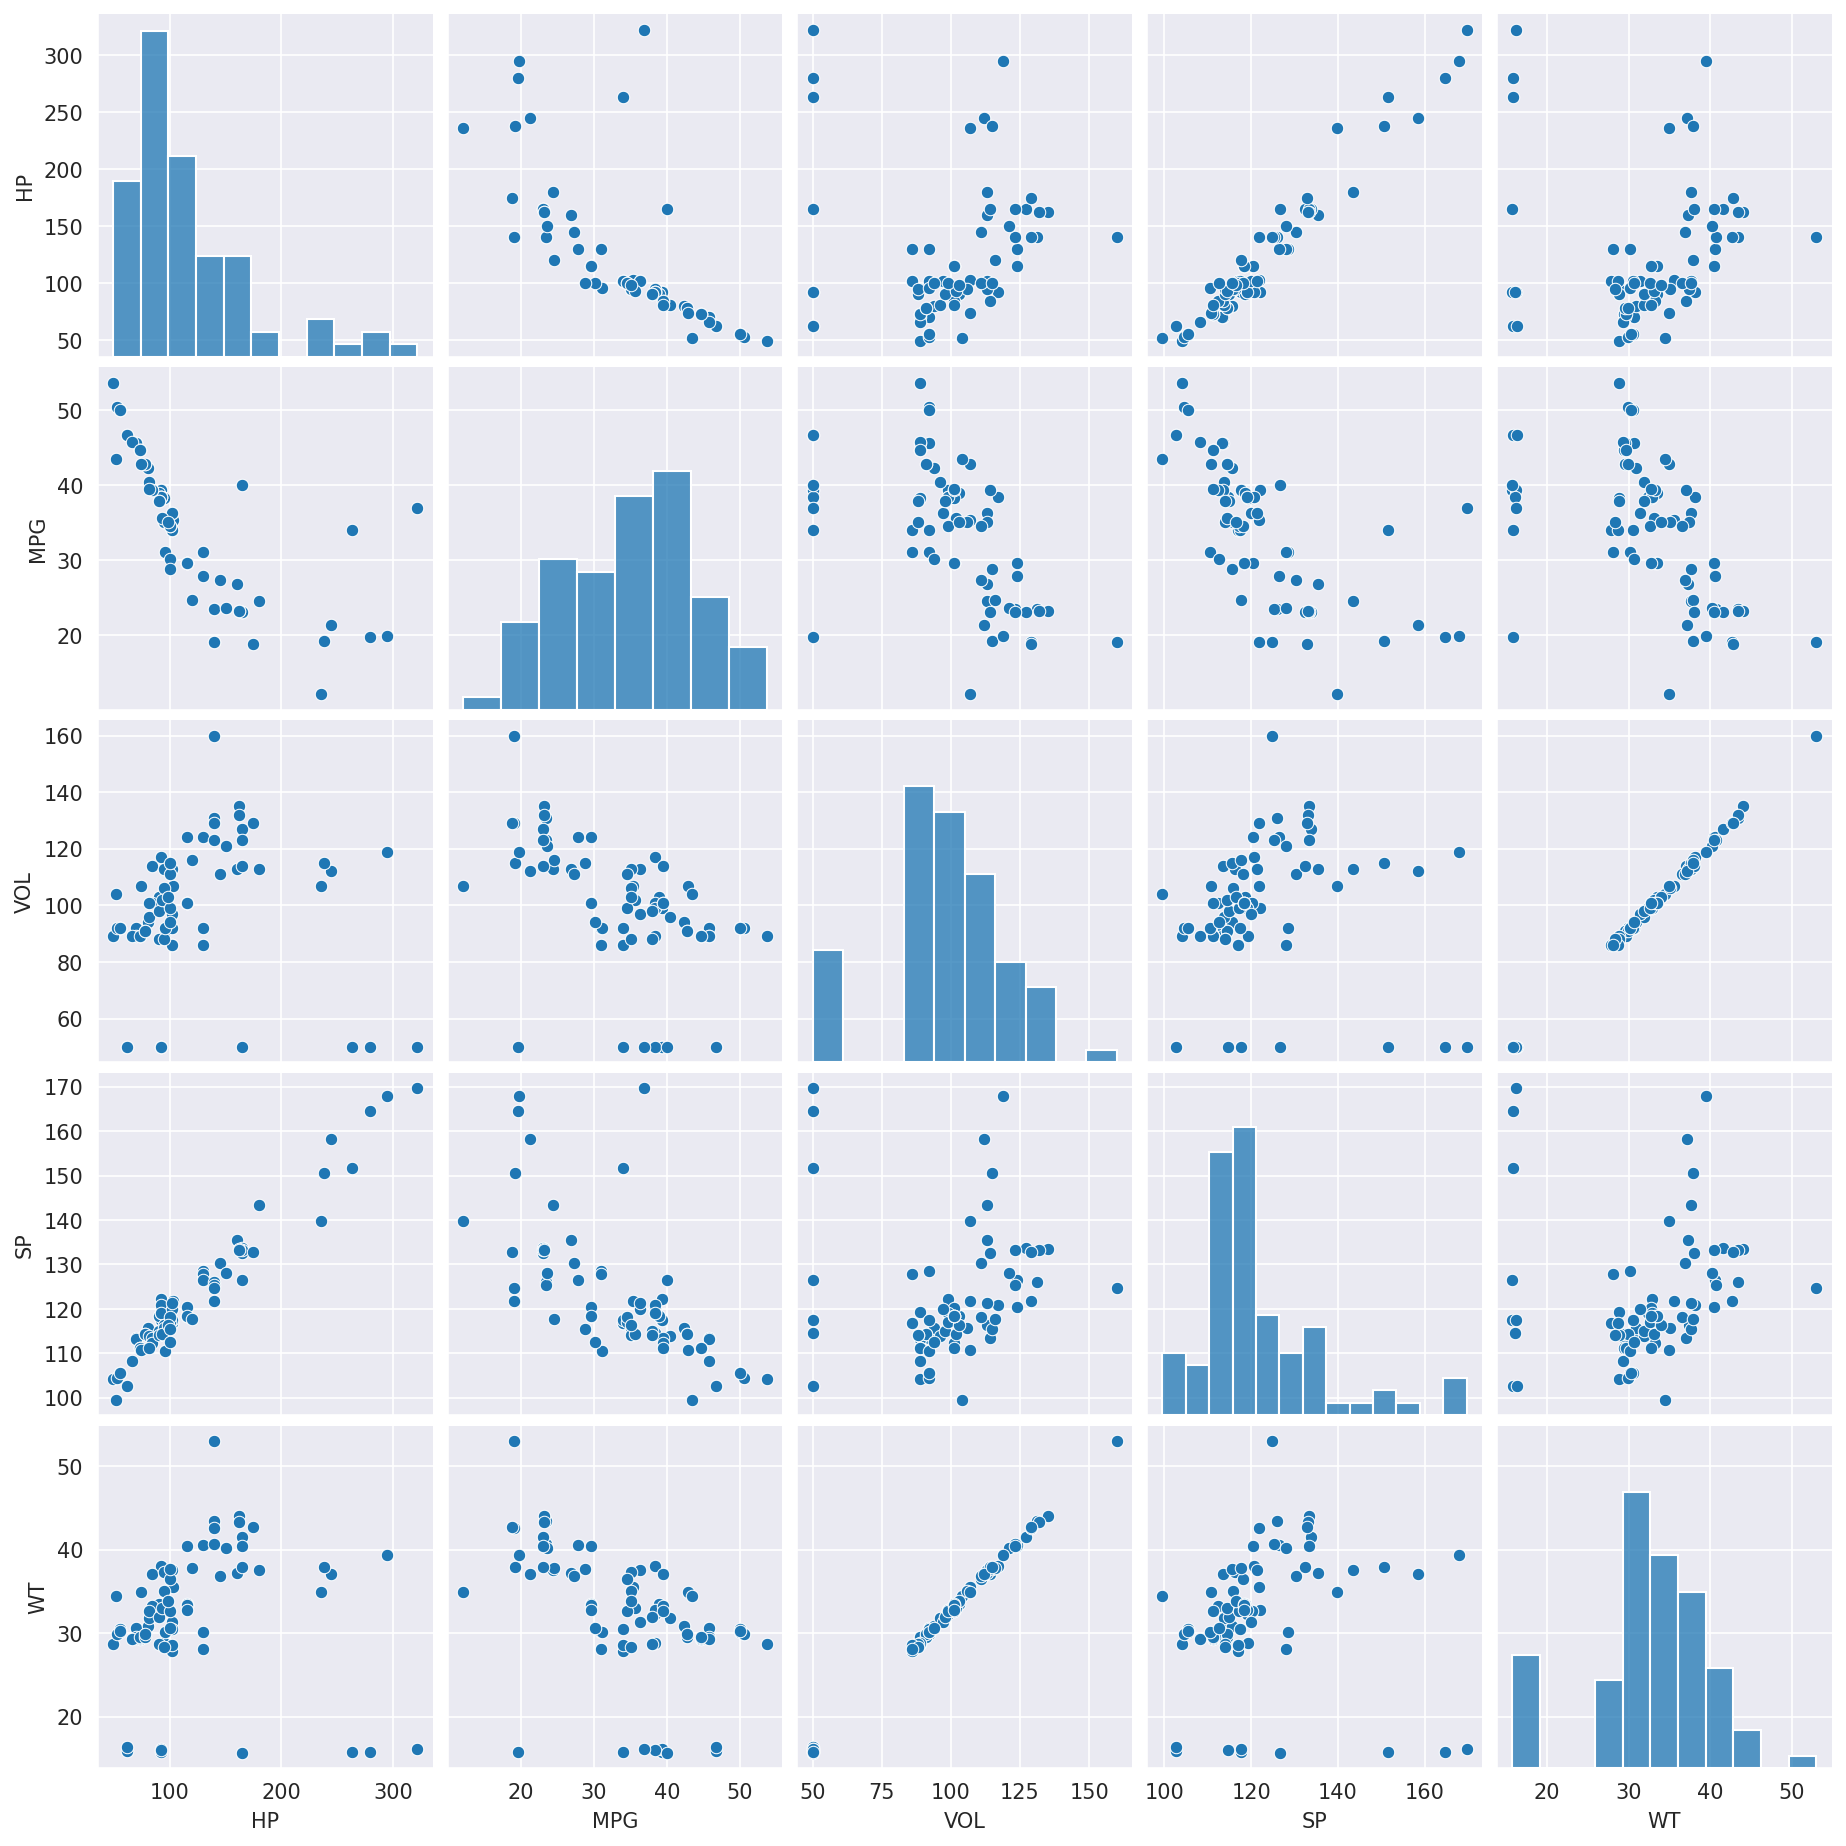

In [ ]:
sns.pairplot(df)



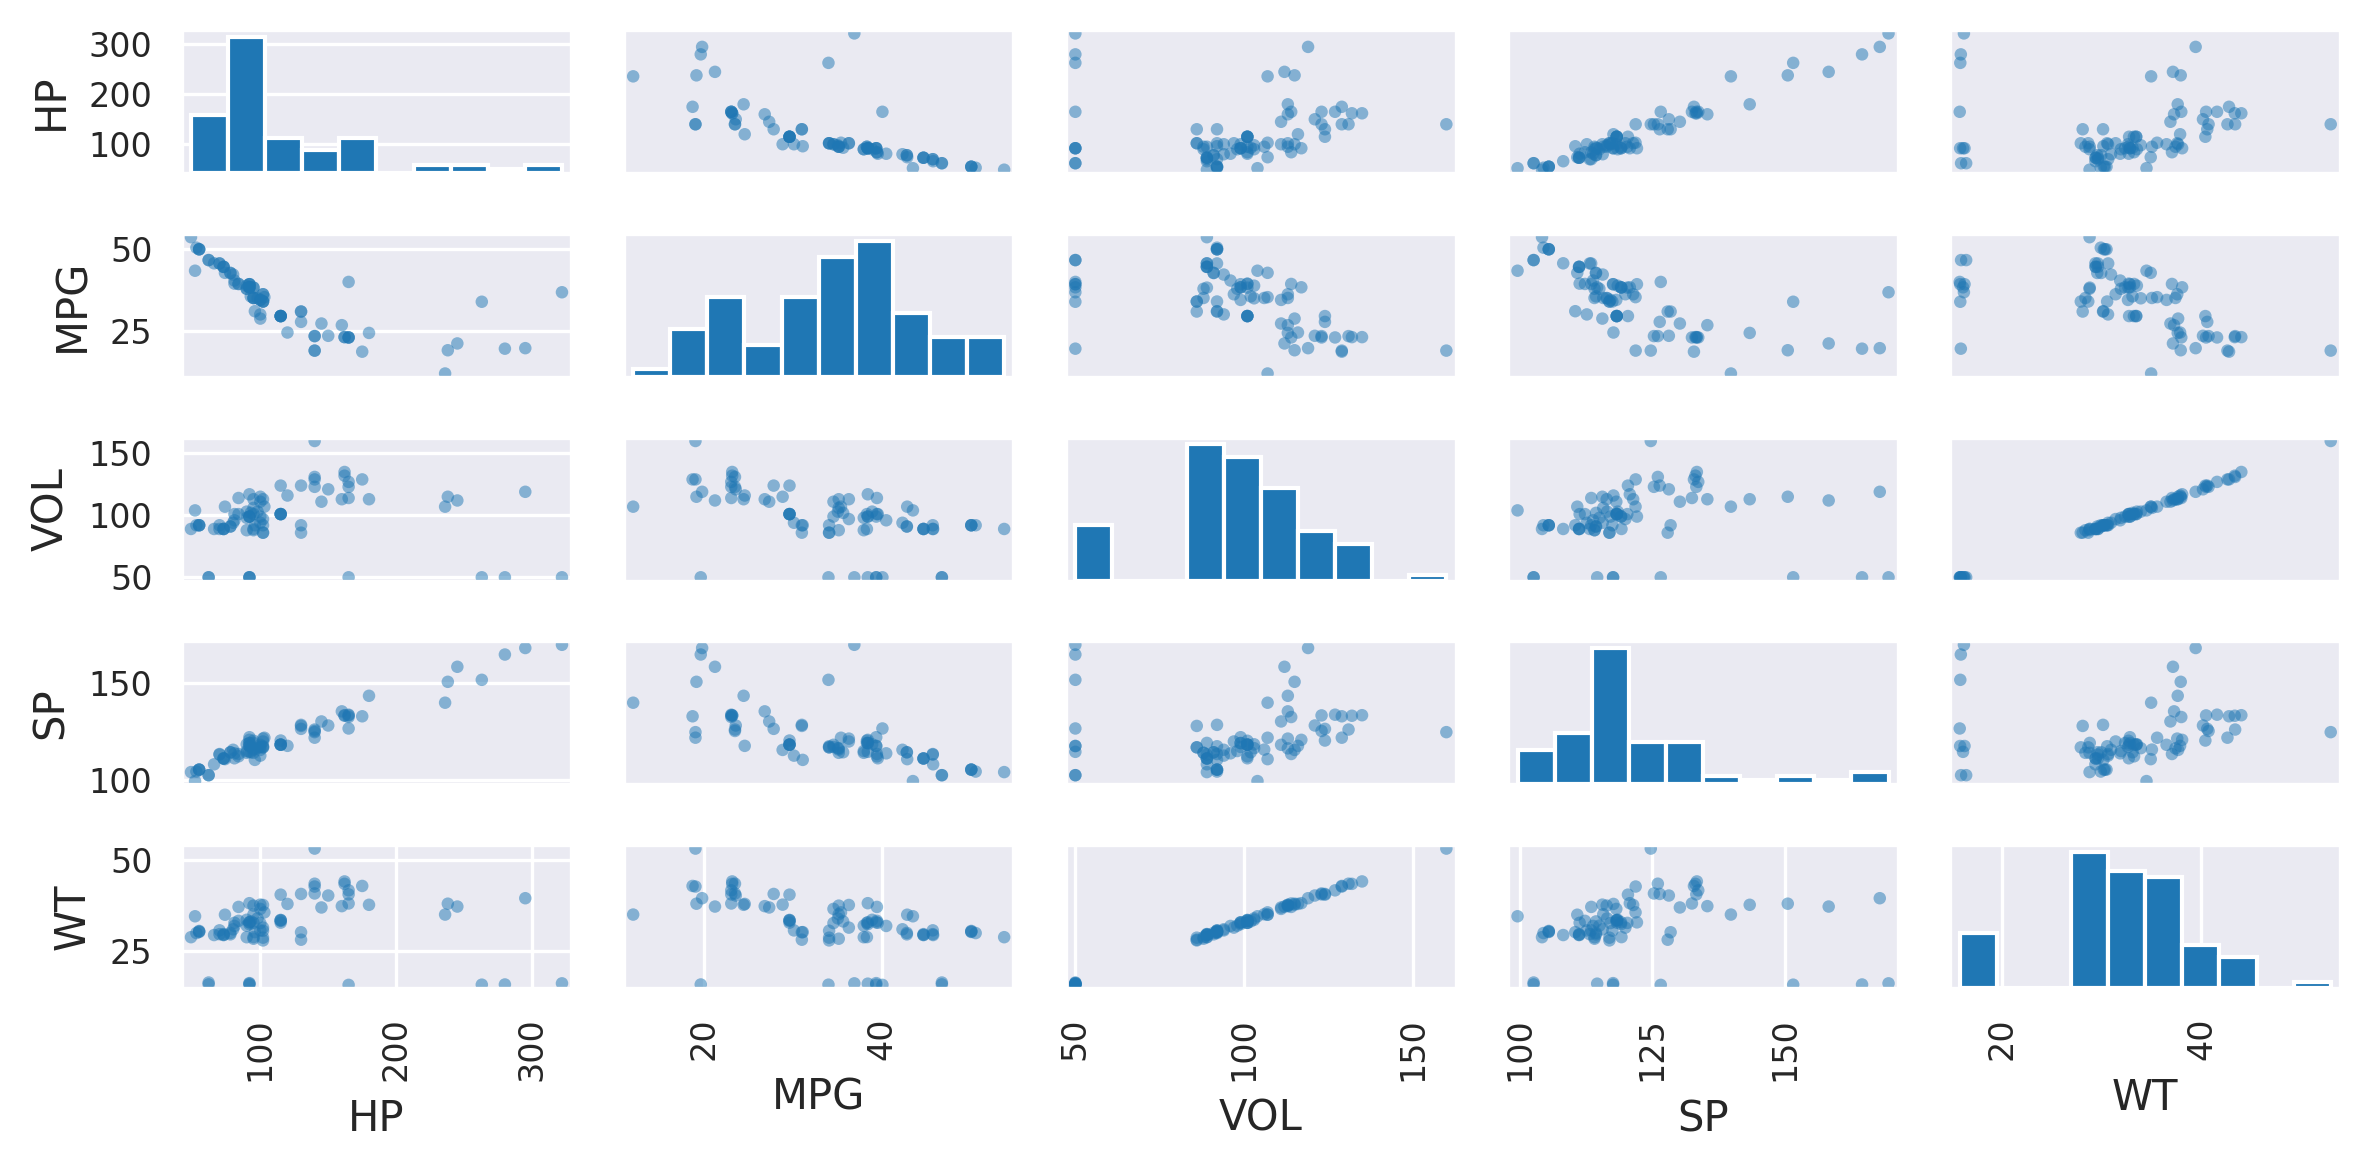

In [ ]:
plt.rcParams['figure.figsize'] = (8,4)
plt.rcParams['figure.dpi'] = 300

pd.plotting.scatter_matrix(df)
plt.tight_layout()

In [ ]:
#checking the value of correlation

df.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


<AxesSubplot:>

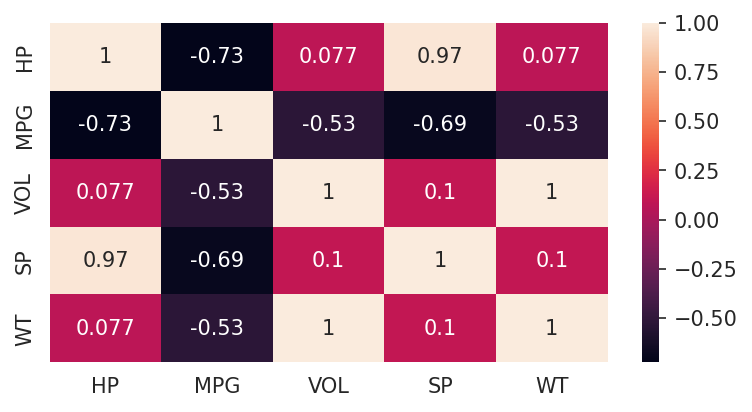

In [ ]:
plt.rcParams['figure.figsize'] = (6,3)
plt.rcParams['figure.dpi'] = 150

sns.heatmap(df.corr(), annot=True)

# **Preparing model**

In [ ]:
#Building the model

import statsmodels.formula.api as smf

In [ ]:
df.columns

Index(['HP', 'MPG', 'VOL', 'SP', 'WT'], dtype='object')

In [ ]:
model = smf.ols('MPG ~ HP+VOL+SP+WT', data = df).fit()

In [ ]:
#coefficients m,c

model.params

Intercept    30.677336
HP           -0.205444
VOL          -0.336051
SP            0.395627
WT            0.400574
dtype: float64

In [ ]:
#tvalue, pvalue

print(model.tvalues, '\n', model.pvalues)

Intercept    2.058841
HP          -5.238735
VOL         -0.590970
SP           2.499880
WT           0.236541
dtype: float64 
 Intercept    0.042936
HP           0.000001
VOL          0.556294
SP           0.014579
WT           0.813649
dtype: float64


In [ ]:
#R squared values

print("R_Sqr value=", model.rsquared, "Adj R_Sqr value=", model.rsquared_adj)

R_Sqr value= 0.7705372737359842 Adj R_Sqr value= 0.7584602881431413


In [ ]:
# model summary

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Thu, 09 Mar 2023   Prob (F-statistic):           1.54e-23
Time:                        08:02:06   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# seems like there is multicollinearity issue, VOL & WT should affect MPG
# lets check them individualy
# MPG ~ WT and VOL


In [ ]:
#MPG~VOL

model_VOL = smf.ols('MPG ~ VOL', data = df).fit()

In [ ]:
model_VOL.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     30.71
Date:                Thu, 09 Mar 2023   Prob (F-statistic):           3.82e-07
Time:                        08:02:06   Log-Likelihood:                -280.28
No. Observations:                  81   AIC:                             564.6
Df Residuals:                      79   BIC:                             569.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.8171      3.957     14.106      0.000      47.941      63.693
VOL           -0.2166      0.039     -5.541      0.000      -0.294      -0.139
==============================================================================
Omnibus:                        2.691   Durbin-Watson:                   0.566
Prob(Omnibus):                  0.260   Jarque-Bera (JB):                1.997
Skew:                          -0.263   Prob(JB):                        0.368
Kurtosis:                       3.562   Cond. No.                         462.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#MPG~WT

model_WT = smf.ols('MPG ~ WT', data = df).fit()


In [ ]:
model_WT.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     30.34
Date:                Thu, 09 Mar 2023   Prob (F-statistic):           4.38e-07
Time:                        08:02:06   Log-Likelihood:                -280.42
No. Observations:                  81   AIC:                             564.8
Df Residuals:                      79   BIC:                             569.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.2296      3.876     14.249      0.000      47.514      62.945
WT            -0.6420      0.117     -5.508      0.000      -0.874      -0.410
==============================================================================
Omnibus:                        2.735   Durbin-Watson:                   0.555
Prob(Omnibus):                  0.255   Jarque-Bera (JB):                2.045
Skew:                          -0.263   Prob(JB):                        0.360
Kurtosis:                       3.573   Cond. No.                         149.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#MCheck PG~Vol+WT

model_VOL_WT = smf.ols('MPG ~ VOL+WT', data = df).fit()

In [ ]:
model_VOL_WT.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     15.33
Date:                Thu, 09 Mar 2023   Prob (F-statistic):           2.43e-06
Time:                        08:02:06   Log-Likelihood:                -280.16
No. Observations:                  81   AIC:                             566.3
Df Residuals:                      78   BIC:                             573.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     56.8847      4.534     12.546      0.000      47.858      65.912
VOL           -0.6983      0.984     -0.710      0.480      -2.658       1.261
WT             1.4349      2.929      0.490      0.626      -4.397       7.266
==============================================================================
Omnibus:                        2.405   Durbin-Watson:                   0.591
Prob(Omnibus):                  0.300   Jarque-Bera (JB):                1.712
Skew:                          -0.251   Prob(JB):                        0.425
Kurtosis:                       3.506   Cond. No.                         597.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#if we put both vol and wt together the pvalue is again becoming high which is incorrecrt occuring due to multicollinearity
#hence we should remove one of these columns
#lets check the VIF and remove one of these columns 


**Calculating VIF**

In [ ]:
df.columns

Index(['HP', 'MPG', 'VOL', 'SP', 'WT'], dtype='object')

In [ ]:
r_hp = smf.ols('HP~VOL+SP+WT',data=df).fit().rsquared
vif_hp = 1/(1-r_hp)

r_vol = smf.ols('VOL~HP+SP+WT',data=df).fit().rsquared
vif_vol = 1/(1-r_vol)

r_sp = smf.ols('SP~VOL+HP+WT',data=df).fit().rsquared
vif_sp = 1/(1-r_sp)

r_wt = smf.ols('WT~VOL+SP+HP',data=df).fit().rsquared
vif_wt = 1/(1-r_wt)

In [ ]:
vif = pd.DataFrame({
    'Feature':['HP', 'VOL', 'SP', 'WT'],
    'VIF':[vif_hp,vif_vol,vif_sp,vif_wt]
})

In [ ]:
vif

,Feature,VIF
0,HP,19.926589
1,VOL,638.806084
2,SP,20.007639
3,WT,639.533818


# **Subset Selection**

**AIC - Akaike information criterion**


*   The Akaike information criterion (AIC) is a mathematical method for evaluating how well a model fits the data it was generated from. In statistics, AIC is used to compare different possible models and determine which one is the best fit for the data.


*   Lower AIC values indicate a better-fit model




In [ ]:
wt = smf.ols('MPG ~ WT+HP+SP', data = df).fit()
wt.aic

476.2992750152976

In [ ]:
vol = smf.ols('MPG ~ VOL+HP+SP', data = df).fit()
vol.aic

475.9875158854609

In [ ]:
wt.rsquared_adj

0.7605016249333465

In [ ]:
vol.rsquared_adj

0.7614216533208333

In [ ]:
print('wt_aic=', wt.aic, '\n', 'vol_aic=', vol.aic, '\n',
      'wt_rsquared=', wt.rsquared_adj, '\n', 'vol_rsquared=', vol.rsquared_adj)

wt_aic= 476.2992750152976 
 vol_aic= 475.9875158854609 
 wt_rsquared= 0.7605016249333465 
 vol_rsquared= 0.7614216533208333


**As per the subset selection, it is clear that VOL column is more important than WT column as it's R2 value is more and AIC value is less,So we will select VOL columns and will drop WT column.**

In [ ]:
df.drop(columns= 'WT',inplace=True)

In [ ]:
df.head(2)

,HP,MPG,VOL,SP
0,49,53.700681,89,104.185353
1,55,50.013401,92,105.461264


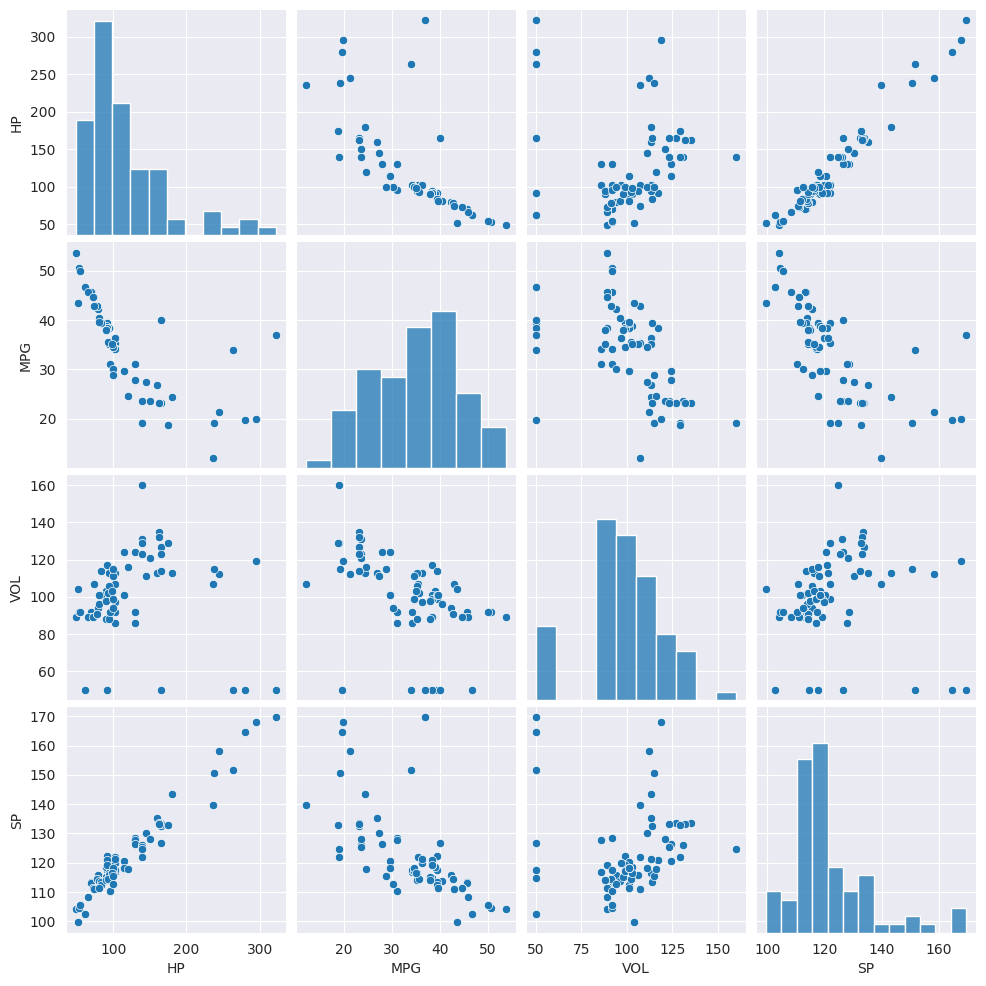

In [ ]:
plt.rcParams['figure.figsize'] = (7,3)
plt.rcParams['figure.dpi'] = 100

sns.pairplot(df)

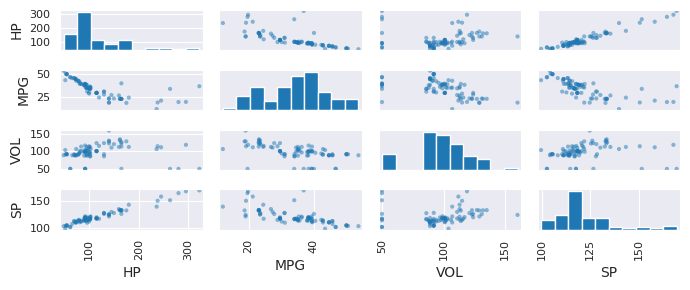

In [ ]:
pd.plotting.scatter_matrix(df)
plt.tight_layout()

In [ ]:
df.corr()

,HP,MPG,VOL,SP
HP,1.000000,-0.725038,0.077459,0.973848
MPG,-0.725038,1.000000,-0.529057,-0.687125
VOL,0.077459,-0.529057,1.000000,0.102170
SP,0.973848,-0.687125,0.102170,1.000000


In [ ]:
#final model

f_model= smf.ols('MPG ~ HP+SP+VOL', data = df).fit()


In [ ]:
f_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     86.11
Date:                Thu, 09 Mar 2023   Prob (F-statistic):           1.56e-24
Time:                        08:02:13   Log-Likelihood:                -233.99
No. Observations:                  81   AIC:                             476.0
Df Residuals:                      77   BIC:                             485.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.9234     14.466      2.069      0.042       1.118      58.729
HP            -0.2067      0.039     -5.353      0.000      -0.284      -0.130
SP             0.4007      0.156      2.571      0.012       0.090       0.711
VOL           -0.2017      0.023     -8.928      0.000      -0.247      -0.157
==============================================================================
Omnibus:                       10.810   Durbin-Watson:                   1.389
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.822
Skew:                           0.704   Prob(JB):                      0.00271
Kurtosis:                       4.233   Cond. No.                     5.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
f_model.rsquared

0.7703683413213018

# Prediction of new data

In [ ]:
newdata = pd.DataFrame({
    'HP' : [45,50,60],
    'VOL': [85,95,100],
    'SP' : [100,125,163]
})

In [ ]:
f_model.predict(newdata)

0    43.547291
1    50.513743
2    62.663496
dtype: float64

# **Model Evaluation Technique**

# **1. Residual Analysis**

**Normality Test**

In [ ]:
vol.resid

0     10.109912
1      7.756607
2      7.756607
3      3.334825
4      8.234688
        ...    
76    15.666857
77     1.330162
78     7.783144
79     7.596179
80    -3.491695
Length: 81, dtype: float64

In [ ]:
import statsmodels.api as sm

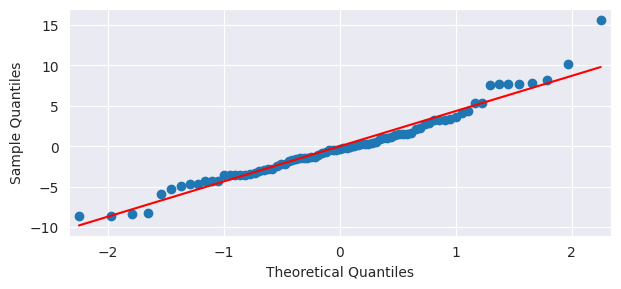

In [ ]:
sm.qqplot(vol.resid, line = 's');

In [ ]:
#get index for higher residuals

np.where(vol.resid>10)


(array([ 0, 76]),)

# **2.Residual Plot for Homoscedasticity**

**Homoscedasticity can be checked by plotting a scatter plot between fitted values and residuals**.

Text(0, 0.5, 'Residual of Vol')

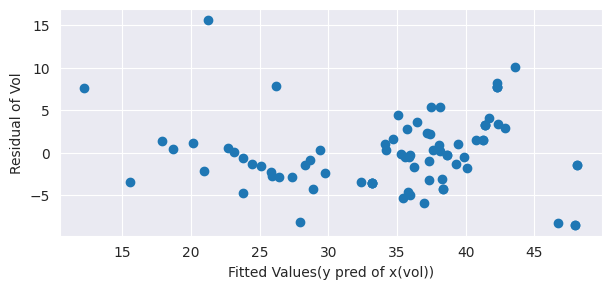

In [ ]:
plt.scatter(x = vol.fittedvalues, y = vol.resid)
plt.xlabel('Fitted Values(y pred of x(vol))')
plt.ylabel('Residual of Vol')

# **MODEL DELETION TECHNIQUES**

# **Cook's Distance**

**Detecting influencers and outliers**

In [ ]:
f_model= smf.ols('MPG ~ HP+SP+VOL', data = df).fit()

In [ ]:
inf_points = f_model.get_influence()
c,p = inf_points.cooks_distance
c

array([4.43781421e-02, 2.31439849e-02, 2.31439849e-02, 5.50743307e-03,
       2.84029117e-02, 3.89961849e-03, 2.31439849e-02, 3.39659293e-03,
       3.39659293e-03, 9.67532550e-04, 3.00465895e-03, 9.32152031e-02,
       2.65177317e-04, 3.00465895e-03, 5.41784561e-03, 3.00465895e-03,
       8.22731925e-04, 9.32152031e-02, 8.22731925e-04, 3.21833541e-04,
       2.70620733e-05, 8.34770054e-03, 1.83348025e-05, 2.72860299e-04,
       1.23307010e-03, 7.41312614e-02, 5.71759163e-03, 2.70620733e-05,
       3.33387970e-02, 9.21393948e-05, 5.93913831e-03, 1.23367282e-03,
       2.67864467e-04, 1.10555542e-03, 1.21312479e-03, 2.01774924e-05,
       4.19374936e-04, 4.18657710e-03, 4.18657710e-03, 1.12077324e-02,
       2.70424384e-04, 3.80042521e-06, 1.99290460e-03, 2.64674273e-03,
       2.22196543e-05, 4.76293133e-04, 2.58868946e-05, 4.92204073e-05,
       1.55796817e-02, 3.53143210e-03, 3.53143210e-03, 3.53143210e-03,
       2.30754944e-05, 1.04055062e-02, 1.07199598e-03, 2.89811901e-04,
      

<StemContainer object of 3 artists>

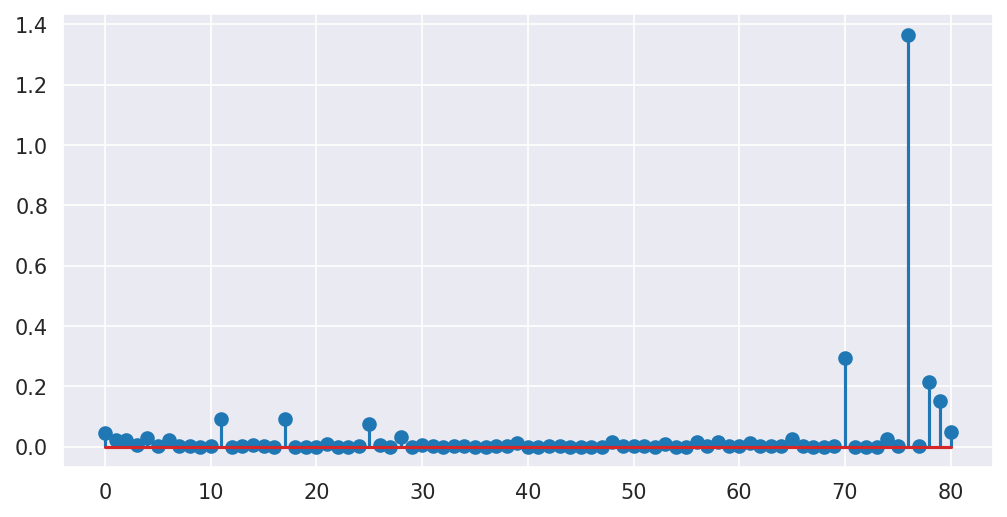

In [ ]:
plt.rcParams['figure.figsize'] = (8,4)
plt.rcParams['figure.dpi'] = 150

# Cook's distance plot

plt.stem(range(len(df)),c)


In [ ]:
len(df)

81

In [ ]:
np.argmax(c),np.max(c)

(76, 1.364174386910335)

In [ ]:
df.iloc[76:77,:]

,HP,MPG,VOL,SP
76,322,36.9,50,169.598513


In [ ]:
df.iloc[[76]]

,HP,MPG,VOL,SP
76,322,36.9,50,169.598513


# **Influence Plot**

In [ ]:
#Calculate cutoff

k = len(df.columns)
n = len(df)

leverage_cut_off = 3*(k+1)/n
leverage_cut_off

0.18518518518518517

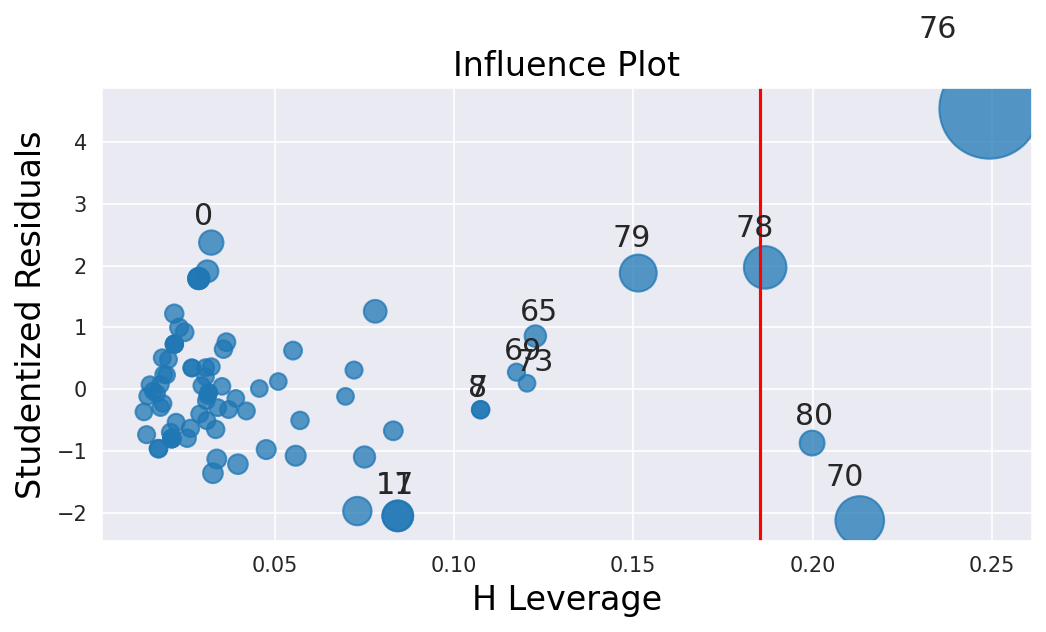

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot

influence_plot(f_model);
plt.axvline(cut_off,color = 'r')


# **Improving the model**

In [ ]:
#Row 76 is havinf the highest leverage so removing the 76th col

df.drop(index=[76], inplace=True)

In [ ]:
df.tail()

,HP,MPG,VOL,SP
75,175,18.762837,129,132.864163
77,238,19.197888,115,150.576579
78,263,34.000000,50,151.598513
79,295,19.833733,119,167.944460
80,236,12.101263,107,139.840817


In [ ]:
#reset the index

df.reset_index(inplace=True)


In [ ]:
df.tail()

,index,HP,MPG,VOL,SP
75,75,175,18.762837,129,132.864163
76,77,238,19.197888,115,150.576579
77,78,263,34.000000,50,151.598513
78,79,295,19.833733,119,167.944460
79,80,236,12.101263,107,139.840817


In [ ]:
df.drop(columns = ['index'], inplace = True)

In [ ]:
df.tail()

,HP,MPG,VOL,SP
75,175,18.762837,129,132.864163
76,238,19.197888,115,150.576579
77,263,34.000000,50,151.598513
78,295,19.833733,119,167.944460
79,236,12.101263,107,139.840817


In [ ]:
f_model = smf.ols('MPG ~ HP+SP+VOL', data = df).fit()

inf = f_model.get_influence()
c,p = inf.cooks_distance
c

array([5.09226374e-02, 2.56771643e-02, 2.56771643e-02, 5.41277886e-03,
       3.16093599e-02, 3.90215825e-03, 2.56771643e-02, 9.02530977e-04,
       9.02530977e-04, 8.08184356e-04, 3.27189323e-03, 9.20102413e-02,
       7.72658639e-04, 3.27189323e-03, 5.79890455e-03, 3.27189323e-03,
       7.51679849e-04, 9.20102413e-02, 7.51679849e-04, 1.33756757e-04,
       1.25357489e-04, 8.43390459e-03, 1.31567497e-06, 1.74994922e-04,
       1.35484299e-03, 7.25485811e-02, 3.81956108e-03, 1.25357489e-04,
       2.95429190e-02, 2.91977510e-04, 5.50460143e-03, 1.10584664e-03,
       3.25161961e-04, 7.16699149e-04, 1.00982859e-03, 3.88171967e-06,
       4.48047137e-04, 4.49131327e-03, 4.49131327e-03, 1.11543428e-02,
       7.76510798e-05, 5.89634396e-05, 2.23706701e-03, 2.91677482e-03,
       8.81125258e-05, 6.33041813e-04, 1.75171731e-06, 1.19170992e-04,
       1.55702626e-02, 4.00872545e-03, 4.00872545e-03, 4.00872545e-03,
       3.56757196e-05, 6.74272453e-03, 5.48645539e-04, 6.46930699e-04,
      

<StemContainer object of 3 artists>

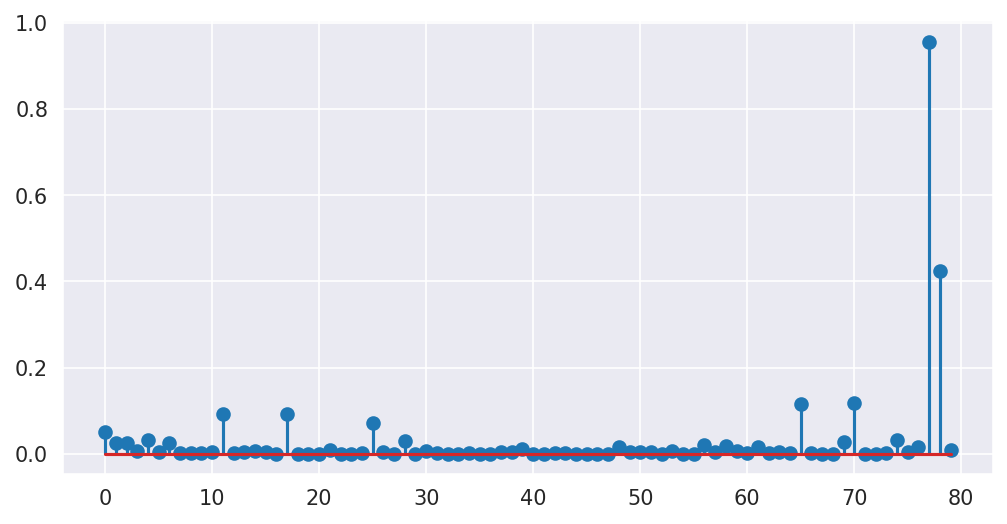

In [ ]:
plt.stem(range(len(df)),c)

In [ ]:
np.argmax(c),np.max(c)

(77, 0.9548691936312594)

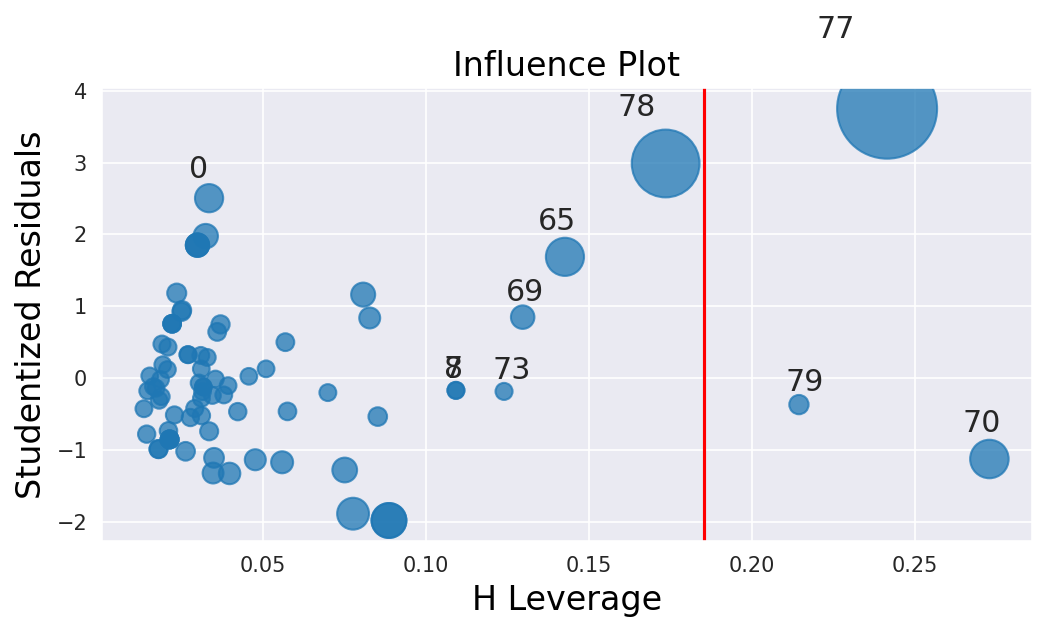

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot

influence_plot(f_model);
plt.axvline(cut_off,color = 'r')

In [ ]:
np.argmax(c),np.max(c)

(77, 0.9548691936312594)

Since the value is <1 , we can stop the diagnostic process and finalize the 
model

---





In [ ]:
final_model = smf.ols('MPG~SP+HP+VOL',data=df).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     114.8
Date:                Thu, 09 Mar 2023   Prob (F-statistic):           3.78e-28
Time:                        08:28:06   Log-Likelihood:                -222.00
No. Observations:                  80   AIC:                             452.0
Df Residuals:                      76   BIC:                             461.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     27.7555     12.922      2.148      0.035       2.018      53.493
SP             0.4124      0.139      2.963      0.004       0.135       0.690
HP            -0.2268      0.035     -6.525      0.000      -0.296      -0.158
VOL           -0.1729      0.021     -8.178      0.000      -0.215      -0.131
==============================================================================
Omnibus:                        9.859   Durbin-Watson:                   1.125
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                9.686
Skew:                           0.767   Prob(JB):                      0.00788
Kurtosis:                       3.742   Cond. No.                     5.77e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Predicting for new records once again

In [ ]:
newdata1 = pd.DataFrame({
    'HP' : [45,50,60],
    'VOL': [85,95,100],
    'SP' : [100,125,163]
})

In [ ]:
f_model.predict(newdata1)

0    44.094709
1    51.541407
2    64.079286
dtype: float64